In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
744,ham,Men like shorter ladies. Gaze up into his eyes.,NaN,NaN,NaN
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
3712,ham,If i not meeting Ì_ all rite then i'll go home...,NaN,NaN,NaN
422,ham,Siva is in hostel aha:-.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns = {'v1':'target', 'v2':'mails'}, inplace=True)

In [10]:
df.head()

,target,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
mails     0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
import matplotlib.pyplot as plt

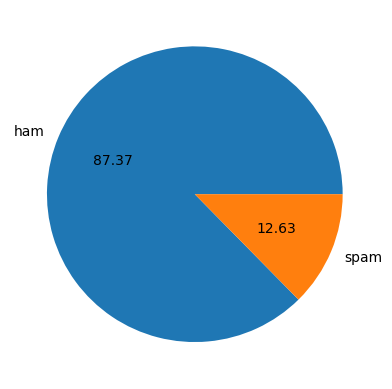

In [22]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
df['num_of_char'] = df['mails'].apply(len)

In [25]:
df.head()

,target,mails,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_of_words'] = df['mails'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,mails,num_of_char,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_of_sent'] = df['mails'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,mails,num_of_char,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_of_char', 'num_of_words', 'num_of_sent']].describe()

,num_of_char,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# for ham
df[df['target'] == 0][['num_of_char', 'num_of_words', 'num_of_sent']].describe()

,num_of_char,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# for spam
df[df['target'] == 1][['num_of_char', 'num_of_words', 'num_of_sent']].describe()

,num_of_char,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

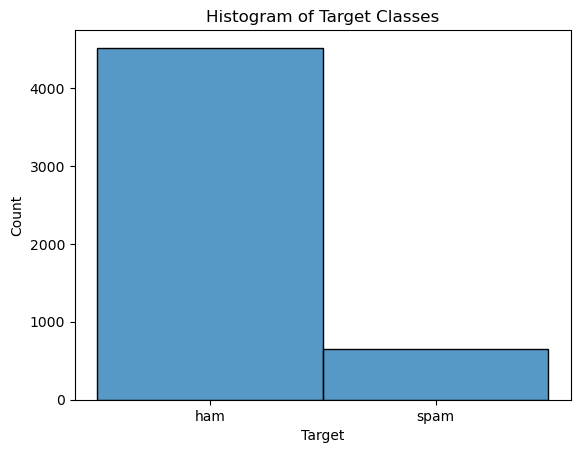

In [34]:
# Plot histogram using Seaborn
sns.histplot(data=df, x='target', bins=2, discrete=True)

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Histogram of Target Classes')

# Customize x-axis ticks to show 'ham' and 'spam' instead of numerical values
plt.xticks([0, 1], ['ham', 'spam'])

# Show plot
plt.show()

<Axes: xlabel='num_of_char', ylabel='Count'>

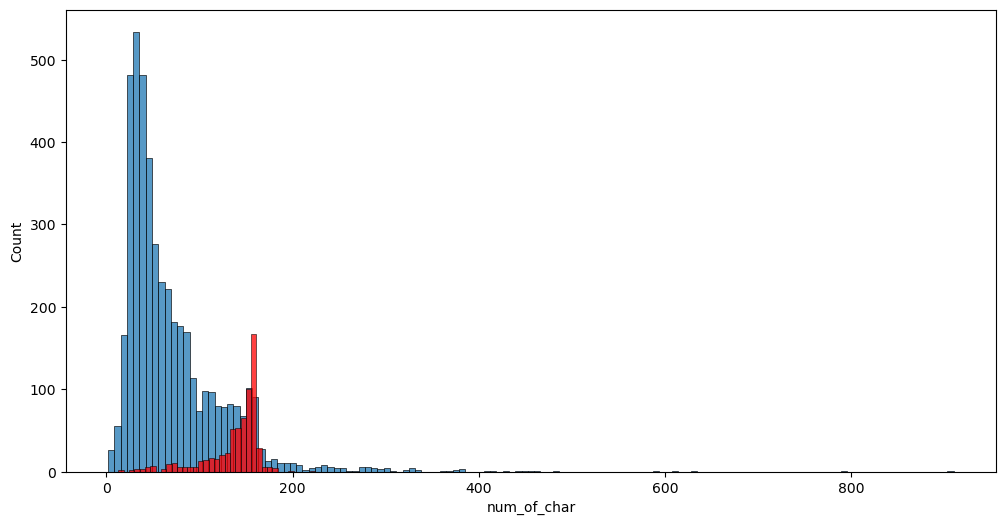

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_char'])
sns.histplot(df[df['target'] == 1]['num_of_char'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

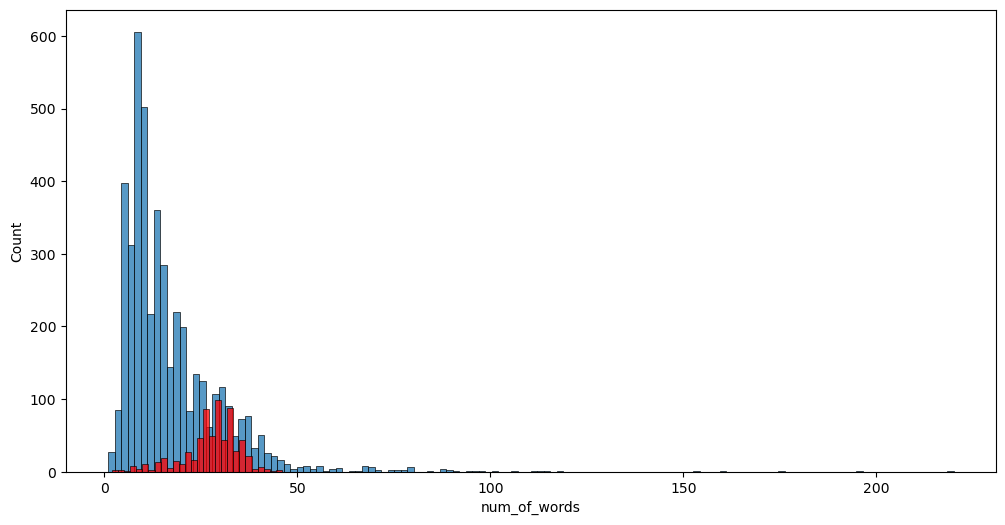

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'],color='red')

<Axes: xlabel='num_of_sent', ylabel='Count'>

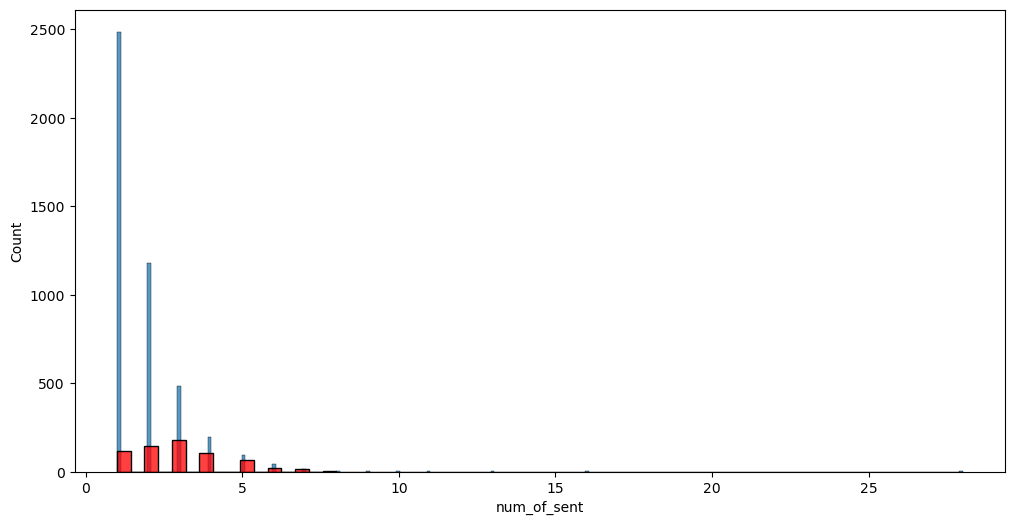

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_sent'])
sns.histplot(df[df['target'] == 1]['num_of_sent'],color='red')

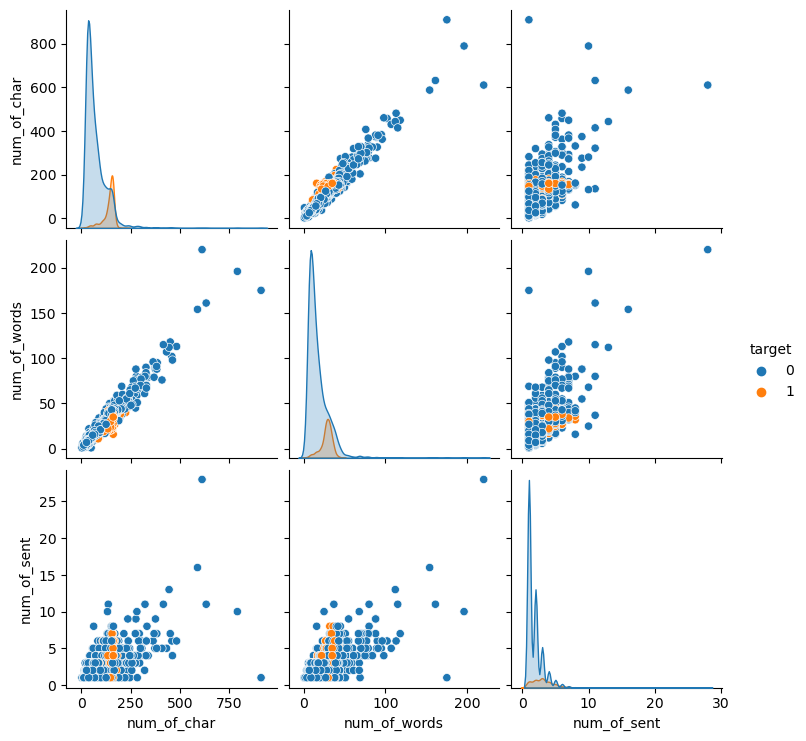

In [38]:
sns.pairplot(df,hue='target')

C:\Users\Dell\AppData\Local\Temp\ipykernel_21396\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

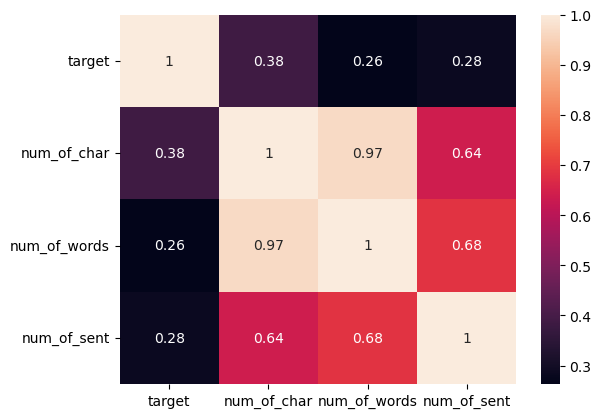

In [39]:
sns.heatmap(df.corr(),annot=True)

# 3. Text Preprocessing

## a) Lower case
## b) Tokenization
## c) Removing special characters
## d) Removing stop words and punctuation
## e) Stemming

In [40]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [41]:
ps = PorterStemmer()

In [42]:
def text_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    a = []
    for i in text:
        if i.isalnum():
            a.append(i)
    
    text = a[:]
    a.clear()
     
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    
    text = a[:]
    a.clear()
    
    for i in text:
        a.append(ps.stem(i))
    
    return " ".join(a)

In [43]:
df['mails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
text_preprocessing('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [45]:
df['preprocessed_text'] = df['mails'].apply(text_preprocessing)

In [46]:
df.head()

,target,mails,num_of_char,num_of_words,num_of_sent,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

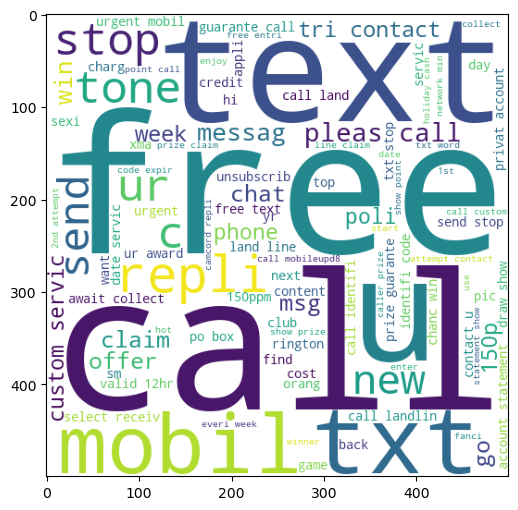

In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['preprocessed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

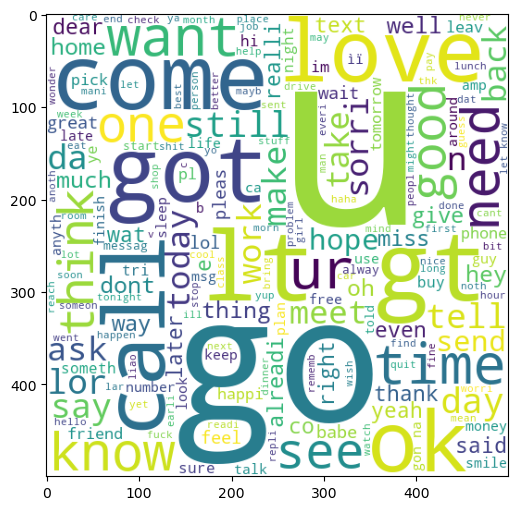

In [49]:
spam_wc = wc.generate(df[df['target'] == 0]['preprocessed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
from collections import Counter

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['preprocessed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

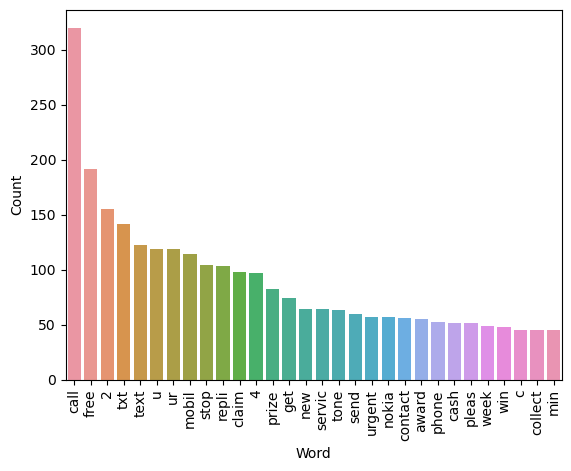

In [52]:
# Assuming spam_corpus is your data
spam_counts = Counter(spam_corpus).most_common(30)
temp_df1 = pd.DataFrame(spam_counts, columns=['Word', 'Count'])

# Create the barplot
sns.barplot(x='Word', y='Count', data=temp_df1)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['preprocessed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)

35394

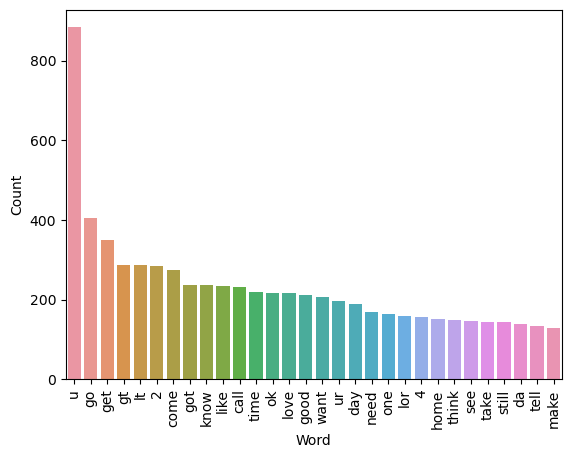

In [54]:
# Assuming spam_corpus is your data
ham_counts = Counter(ham_corpus).most_common(30)
temp_df2 = pd.DataFrame(ham_counts, columns=['Word', 'Count'])

# Create the barplot
sns.barplot(x='Word', y='Count', data=temp_df2)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [55]:
df.head()

,target,mails,num_of_char,num_of_words,num_of_sent,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

In [57]:
tfidf = TfidfVectorizer()

In [58]:
X = tfidf.fit_transform(df['preprocessed_text']).toarray()
X = csr_matrix(X).toarray()

In [59]:
y = df['target']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
X_train.shape, y_train.shape

((4135, 6708), (4135,))

In [63]:
X_test.shape, y_test.shape

((1034, 6708), (1034,))

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
# naive bayes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [67]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [68]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [69]:
# logistic regression
mnb = MultinomialNB()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

In [70]:
algos = {
    'MNB': mnb,
    'LR': lr,
    'DT': dt,
    'RF': rf,
    'SVC': svc
}

In [71]:
def train_model(algo, X_train, y_train, X_test, y_test):
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [72]:
accuracy_scores = []
precision_scores = []

for name,algo in algos.items():
    
    current_accuracy,current_precision = train_model(algo, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  MNB
Accuracy -  0.9593810444874274
Precision -  1.0
For  LR
Accuracy -  0.9477756286266924
Precision -  0.9883720930232558
For  DT
Accuracy -  0.9526112185686654
Precision -  0.8111888111888111
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828


In [73]:
performance_df = pd.DataFrame({'Algorithm':algos.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
0,MNB,0.959381,1.000000
3,RF,0.971954,1.000000
1,LR,0.947776,0.988372
4,SVC,0.972921,0.974138
2,DT,0.952611,0.811189


In [75]:
from sklearn.ensemble import VotingClassifier

In [76]:
# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('mnb', mnb), ('rf', rf), ('svc', svc)], voting='hard')

# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)

print(f"Voting Classifier - Accuracy: {accuracy_voting}, Precision: {precision_voting}")

Voting Classifier - Accuracy: 0.9738878143133463, Precision: 1.0


In [77]:
import pickle

In [78]:
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(voting_classifier,open('voting_classifier_model_1.pkl','wb'))

In [79]:
df.head()

,target,mails,num_of_char,num_of_words,num_of_sent,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
df['mails'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [81]:
# Collect user input and preprocess it
new_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

if isinstance(new_text, str):
    new_text = [new_text]

# Transform the preprocessed text into TF-IDF vectors
trans = tfidf.transform(new_text)

# Convert sparse TF-IDF vectors to dense format
dense_trans = csr_matrix(trans).toarray()

# Make predictions using the loaded SVM model
predictions = voting_classifier.predict(dense_trans)

# Display results
print("Predicted Labels:")
for prediction in predictions:
    print(prediction)

Predicted Labels:
1
